In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [43]:
df = pd.read_csv('app_train_completed.csv')

df = df.loc[0:150000]

df

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,bureau_DAYS_CREDIT_UPDATE_mean_y,bureau_DAYS_CREDIT_UPDATE_max_y,bureau_DAYS_CREDIT_UPDATE_min_y,bureau_DAYS_CREDIT_UPDATE_sum_y,bureau_AMT_ANNUITY_count_y,bureau_AMT_ANNUITY_mean_y,bureau_AMT_ANNUITY_max_y,bureau_AMT_ANNUITY_min_y,bureau_AMT_ANNUITY_sum_y,TARGET
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,-499.875000,-7.0,-1185.0,-3999.0,7.0,0.000,0.000,0.000,0.000,1
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,-816.000000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.000,0
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,-532.000000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.000,0
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,-783.000000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,273885,0,112500.0,448056.0,16888.5,315000.0,0.024610,-11664,-1370.0,-5145.0,...,-270.000000,-31.0,-509.0,-540.0,0.0,NaN,NaN,NaN,0.000,0
149997,273886,1,157500.0,1169532.0,42138.0,945000.0,0.020713,-15851,-2317.0,-9742.0,...,-1279.333333,-16.0,-2370.0,-3838.0,2.0,25143.750,26932.500,23355.000,50287.500,0
149998,273887,0,157500.0,203760.0,16096.5,180000.0,0.006629,-13422,-1433.0,-447.0,...,-7.000000,-7.0,-7.0,-7.0,1.0,18450.000,18450.000,18450.000,18450.000,1
149999,273888,0,202500.0,1006920.0,39933.0,900000.0,0.032561,-10227,-3365.0,-10163.0,...,-319.600000,-16.0,-749.0,-1598.0,1.0,3430.125,3430.125,3430.125,3430.125,0


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

for i in df.select_dtypes(include='object').columns:
    enc = OrdinalEncoder()
    #print(train_df[i])
    df[i].fillna(df[i].mode()[0], inplace=True)
    df[i]= enc.fit_transform(df[[i]])


#Standerization
scaler = StandardScaler()
app_train_scaled = scaler.fit_transform(df.drop(columns='TARGET'))
pre_app_train_df = pd.DataFrame(app_train_scaled, index=df.index, columns=df.drop(columns='TARGET').columns)
pre_app_train_df['TARGET'] = df['TARGET']
pre_app_train_df

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,bureau_DAYS_CREDIT_UPDATE_mean_y,bureau_DAYS_CREDIT_UPDATE_max_y,bureau_DAYS_CREDIT_UPDATE_min_y,bureau_DAYS_CREDIT_UPDATE_sum_y,bureau_AMT_ANNUITY_count_y,bureau_AMT_ANNUITY_mean_y,bureau_AMT_ANNUITY_max_y,bureau_AMT_ANNUITY_min_y,bureau_AMT_ANNUITY_sum_y,TARGET
0,-1.732572,-0.579812,0.105387,-0.477683,-0.164928,-0.506337,-0.149337,1.501937,0.745930,0.377910,...,0.104737,0.376025,-0.001281,-0.173602,2.117621,-0.087803,-0.061874,-0.142472,-0.050453,1
1,-1.732552,-0.579812,0.317082,1.724193,0.588773,1.597921,-1.253917,-0.169937,0.509850,1.076291,...,-0.584308,0.276067,-0.838450,0.018482,-0.470146,NaN,NaN,NaN,-0.050453,0
2,-1.732532,-0.579812,-0.318005,-1.151965,-1.395088,-1.090177,-0.784073,-0.692054,0.922455,0.204308,...,0.034715,-0.665197,0.443852,0.593427,-0.470146,NaN,NaN,NaN,-0.050453,0
3,-1.732492,-0.579812,-0.106309,-0.710841,0.176766,-0.652297,-0.929782,-0.682669,-0.283226,-1.376552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,-1.732472,-0.579812,-0.148648,-0.213523,-0.359213,-0.068456,0.564515,-0.894858,-0.282797,0.189841,...,-0.512379,-1.778611,0.354472,0.666864,-0.470146,NaN,NaN,NaN,-0.050453,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1.730487,-0.579812,-0.176875,-0.374756,-0.700290,-0.603643,0.271142,0.997674,0.431871,-0.046735,...,0.605786,0.309387,0.596950,0.730369,-0.470146,NaN,NaN,NaN,-0.050453,0
149997,1.730507,0.806732,-0.035744,1.416417,1.030076,1.099224,-0.010939,0.039276,0.026121,-1.350739,...,-1.594217,0.351035,-1.049955,-0.131526,0.269216,0.043339,-0.017876,0.336396,0.068122,0
149998,1.730527,-0.579812,-0.035744,-0.981258,-0.754566,-0.968544,-1.030395,0.595270,0.404878,1.285919,...,1.179036,0.376025,1.041198,0.869662,-0.100465,0.008426,-0.031733,0.235824,-0.006949,1
149999,1.730547,-0.579812,0.105387,1.012708,0.878966,0.977591,0.846668,1.326601,-0.422903,-1.470162,...,0.497675,0.351035,0.384560,0.453873,-0.100465,-0.069912,-0.056270,-0.072141,-0.042365,0


In [45]:
a = pre_app_train_df.corrwith(pre_app_train_df["TARGET"]).abs().sort_values(ascending=False).reset_index()
b = a.loc[0:20]['index']

columns = []

for i in b:
    columns.append(i)
    

app_train_df = pre_app_train_df[columns]
app_train_df


,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_mean_y,DAYS_BIRTH,CLIENT_AGE,YEARS_EMPLOYED,DAYS_EMPLOYED,...,bureau_DAYS_CREDIT_min_y,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_mean_y,DAYS_EMPLOYED_PERCENT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_M,CODE_GENDER_F
0,1,-1.903804,-1.307550,-1.982609,0.373604,0.373604,1.501937,-1.501937,-0.745930,0.745930,...,0.378195,0.104737,0.104737,-0.668901,-0.064931,-0.105189,0.965753,-0.567145,1.389778,-1.389716
1,0,NaN,0.565762,-0.902504,-0.559421,-0.559421,-0.169937,0.169937,-0.509850,0.509850,...,-0.951574,-0.584308,-0.584308,-0.642415,-2.051013,-2.065252,-1.035461,1.763219,-0.719540,0.719572
2,0,1.123231,0.219909,NaN,0.386003,0.386003,-0.692054,0.692054,-0.922455,0.922455,...,0.506659,0.034715,0.034715,-1.085092,-0.064931,-0.105189,0.965753,-0.567145,1.389778,-1.389716
3,0,NaN,0.712770,NaN,NaN,NaN,-0.682669,0.682669,0.283226,-0.283226,...,NaN,NaN,NaN,0.025129,-0.064931,-0.105189,0.965753,-0.567145,-0.719540,0.719572
4,0,NaN,-0.995817,NaN,-0.113500,-0.113500,-0.894858,0.894858,0.282797,-0.282797,...,0.711506,-0.512379,-0.512379,-0.031001,-0.064931,-0.105189,0.965753,-0.567145,1.389778,-1.389716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.470935,-0.312248,NaN,1.173339,1.173339,0.997674,-0.997674,-0.431871,0.431871,...,1.449881,0.605786,0.605786,-0.293111,-0.064931,-0.105189,0.965753,-0.567145,1.389778,-1.389716
149997,0,NaN,0.184222,0.258123,-1.485065,-1.485065,0.039276,-0.039276,-0.026121,0.026121,...,-0.780290,-1.594217,-1.594217,-0.077814,-0.064931,1.854874,0.965753,-0.567145,-0.719540,0.719572
149998,1,-0.777622,0.480660,NaN,-0.304799,-0.304799,0.595270,-0.595270,-0.404878,0.404878,...,0.586514,1.179036,1.179036,-0.373255,-0.064931,-0.105189,0.965753,-0.567145,1.389778,-1.389716
149999,0,0.812881,0.704284,NaN,0.743802,0.743802,1.326601,-1.326601,0.422903,-0.422903,...,0.095807,0.497675,0.497675,1.293037,-2.051013,-2.065252,-1.035461,-0.567145,-0.719540,0.719572


In [46]:
X = app_train_df.drop(columns = ['TARGET'])
y = app_train_df['TARGET']

In [47]:
#Handeling Nan values on training set
# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

y = y.to_numpy(dtype=int)
y = y.reshape(-1, 1)

# Need to impute missing values
X = imputer.fit_transform(X)
y = imputer.fit_transform(y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
#Simple Logistic Regression Model just to see if this type of approach works

# instantiating the model
log_reg = LogisticRegression()
# parameters for grid search
param_grid = {'C': np.arange(0, 10, 1), "penalty":['none', 'l1', 'l2', 'elasticnet'], "solver":['saga', 'newton-cg', 'lbfgs', 'liblinear']} 


# inserting model in pipeline and fitting the data. Ideally, bit in this first case lets fit the logistic regression direectly
'''log_pipeline = Pipeline([
                    ('preprocessor', preprocess_pipeline), 
                    ('log_reg', log_reg)])'''



#we use GridSearchCV to automate the tuning of hyperparameters.
# grid search
logreg_cv=GridSearchCV(log_reg,param_grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.9183666666666668


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


logreg1= LogisticRegression(C=0 , penalty = 'none', solver = 'newton-cg', class_weight = 'balanced')
logreg1.fit(X_train,y_train)
y_test_predicted = logreg1.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.156
Recall score: 0.663
Accuracy score: 0.679
F1 score: 0.253
AUC score: 0.672


In [55]:
logreg2= LogisticRegression(C=0 , penalty = 'none', solver = 'newton-cg', class_weight = {1:2})
logreg2.fit(X_train,y_train)
y_test_predicted = logreg2.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.371
Recall score: 0.063
Accuracy score: 0.915
F1 score: 0.108
AUC score: 0.527


In [57]:
logreg3= LogisticRegression(C=0 , penalty = 'none', solver = 'newton-cg', class_weight = {1:10})
logreg3.fit(X_train,y_train)
y_test_predicted = logreg3.predict(X_test)

print(f'Precision score: {round(precision_score(y_test, y_test_predicted), 3)}')
print(f'Recall score: {round(recall_score(y_test, y_test_predicted), 3)}')
print(f'Accuracy score: {round(accuracy_score(y_test, y_test_predicted), 3)}')
print(f'F1 score: {round(f1_score(y_test, y_test_predicted), 3)}')
print(f'AUC score: {round(roc_auc_score(y_test, y_test_predicted), 3)}')

Precision score: 0.166
Recall score: 0.615
Accuracy score: 0.716
F1 score: 0.262
AUC score: 0.67


<AxesSubplot:>

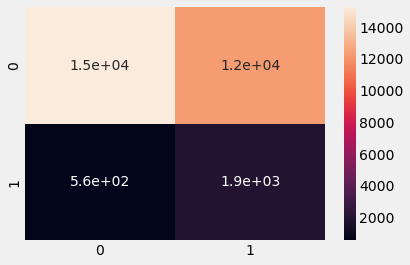

In [53]:
cf_matrix = confusion_matrix(y_test, y_test_predicted)
sns.heatmap(cf_matrix, annot=True)